МОДЕЛИРОВАНИЕ ОБРАБОТКИ СИГНАЛОВ
Задание 1: Анализ системы с новыми параметрами
Параметры: t1=[1, 4], t2=[1, 4]

Результаты симуляции:
  Всего сигналов: 100
  Обработано: 62
  Доля обработанных: 62.00%
  Средний интервал поступления: 2.411 сек
  Среднее время обработки: 2.493 сек

Первые 8 сигналов:
  Моменты поступления T1: 
['  2.124', '  5.976', '  9.172', ' 11.968', ' 13.436', ' 14.904', ' 16.078', ' 19.677']
  Продолжительность обработки t2:    
['  1.094', '  2.909', '  1.943', '  2.526', '  3.723', '  1.748', '  2.231', '  3.267']
  Моменты конца обработки:  
['  3.218', '  8.885', ' 11.115', ' 14.493', ' -1.000', ' 16.652', ' -1.000', ' 22.943']
  Процент обработки: 62.00%

Задание 2: Имитационное моделирование

Результаты численных экспериментов:
----------------------------------------------------------------------
Тест                           Параметры                 Доля       Ожидание  
----------------------------------------------------------------------
Минимальная н

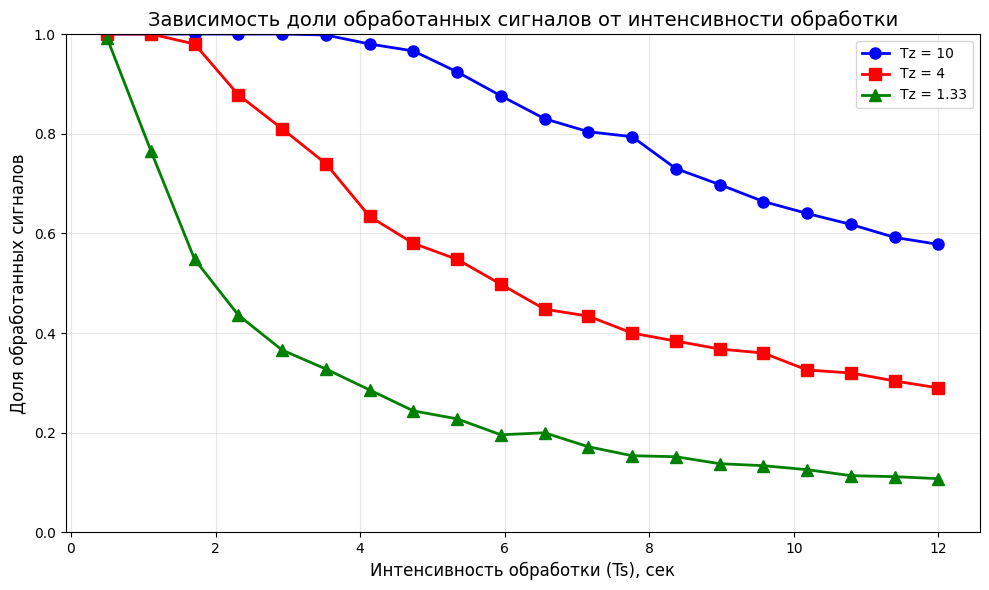


Задание 3b: Зависимость от интенсивности поступления (Tz)
Построен график зависимости доли обработанных сигналов от Tz


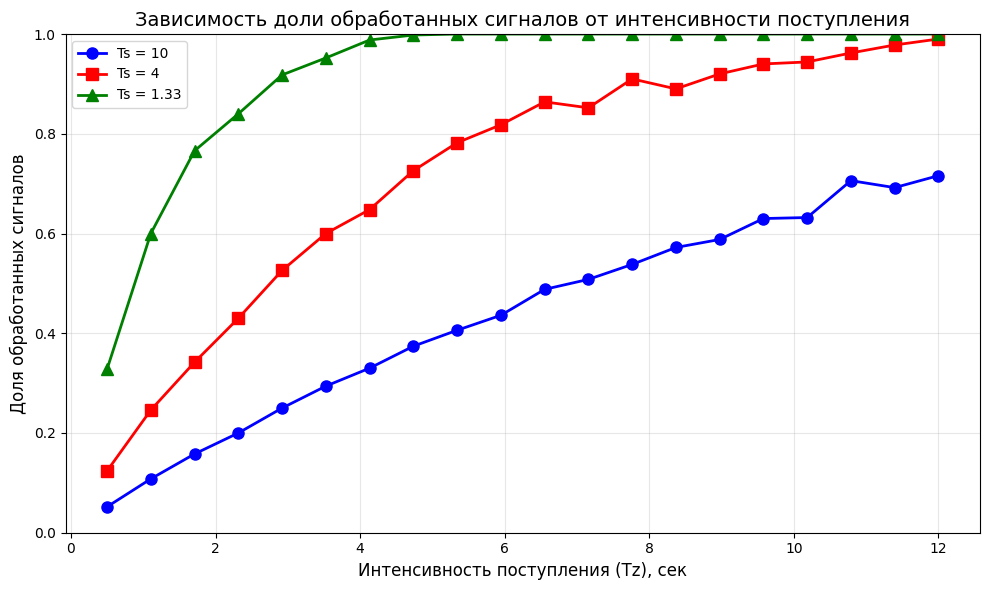


Задание 3c: Зависимость от коэффициента загрузки (ro = Ts/Tz)
Построен график зависимости доли обработанных сигналов от ro


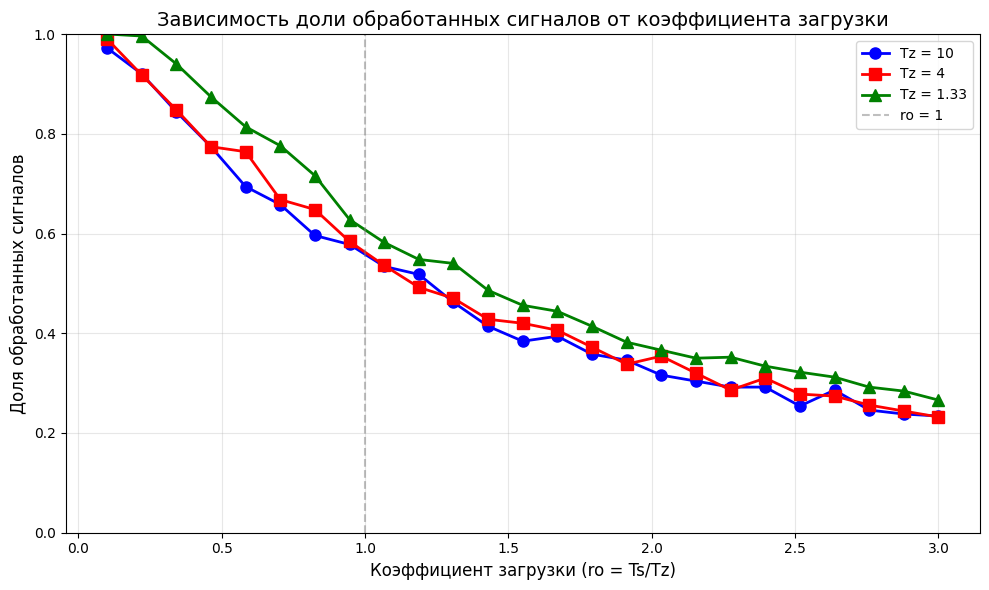


Моделирование завершено!


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Optional, Callable
import warnings
warnings.filterwarnings('ignore')

# ================== Вспомогательные функции ==================

@dataclass
class SimulationConfig:
    """Конфигурация симуляции"""
    t1_min: float
    t1_max: float
    t2_min: float
    t2_max: float
    num_signals: int = 100

def generate_intervals(min_val: float, max_val: float, size: int) -> np.ndarray:
    """Генерация случайных интервалов с равномерным распределением"""
    return np.random.uniform(min_val, max_val, size)

def compute_arrival_times(intervals: np.ndarray) -> np.ndarray:
    """Вычисление моментов поступления сигналов"""
    return np.cumsum(intervals)

def simulate_processing(arrival_times: np.ndarray, processing_times: np.ndarray) -> Tuple[np.ndarray, np.ndarray, int]:
    """
    Симуляция обработки сигналов
    Если сигнал приходит во время обработки предыдущего - он теряется
    Возвращает: времена начала обработки, времена окончания обработки, количество обработанных сигналов
    """
    n = len(arrival_times)
    start_times = np.zeros(n)
    end_times = np.zeros(n)

    processed_count = 0
    last_end_time = 0

    for i in range(n):
        # Проверяем, свободен ли сервер в момент прихода сигнала
        if arrival_times[i] >= last_end_time:
            # Сервер свободен - обрабатываем
            start_times[i] = arrival_times[i]
            end_times[i] = start_times[i] + processing_times[i]
            last_end_time = end_times[i]
            processed_count += 1
        else:
            # Сервер занят - сигнал теряется
            start_times[i] = arrival_times[i]  # маркер потери
            end_times[i] = -1

    return start_times, end_times, processed_count

def create_timeline_data(arrival_times: np.ndarray, start_times: np.ndarray,
                         end_times: np.ndarray, num_signals: int = 8) -> List[Tuple]:
    """
    Подготовка данных для временной диаграммы
    Возвращает список кортежей (номер_сигнала, время_начала, время_окончания, тип)
    """
    timeline_data = []
    for i in range(min(num_signals, len(arrival_times))):
        # Приход сигнала
        timeline_data.append((i + 1, arrival_times[i], arrival_times[i], 'arrival'))
        # Обработка сигнала
        timeline_data.append((i + 1, start_times[i], end_times[i], 'processing'))

    return timeline_data

# ================== Функции для построения графиков ==================

def plot_timeline_diagram(timeline_data: List[Tuple], title: str = "Временная диаграмма"):
    ...
    # """
    # Построение временной диаграммы прихода и обработки сигналов
    # """
    # fig, ax = plt.subplots(figsize=(12, 6))
    #
    # # Разделяем данные по типам
    # arrivals = [(num, time) for num, start, end, typ in timeline_data if typ == 'arrival']
    # processings = [(num, start, end) for num, start, end, typ in timeline_data if typ == 'processing']
    #
    # # Отображаем приходы
    # for num, time in arrivals:
    #     ax.scatter(time, num, color='green', marker='v', s=100, zorder=5)
    #     ax.axvline(x=time, ymin=0, ymax=num/10, color='green', linestyle='--', alpha=0.3)
    #
    # # Отображаем обработку
    # for num, start, end in processings:
    #     ax.barh(num, end - start, left=start, height=0.3, color='red', alpha=0.7)
    #
    # ax.set_xlabel('Время (сек)')
    # ax.set_ylabel('Номер сигнала')
    # ax.set_title(title)
    # ax.grid(True, alpha=0.3)
    # ax.set_yticks(range(1, len(arrivals) + 1))
    #
    # # Легенда
    # from matplotlib.patches import Patch
    # from matplotlib.lines import Line2D
    # legend_elements = [
    #     Line2D([0], [0], marker='v', color='w', markerfacecolor='green', markersize=10, label='Приход сигнала'),
    #     Patch(facecolor='red', alpha=0.7, label='Обработка')
    # ]
    # ax.legend(handles=legend_elements)
    #
    # plt.tight_layout()
    # return fig, ax

def plot_dependency(x_values: List[float],
                    y_values: List[float],
                    x_label: str,
                    y_label: str,
                    title: str,
                    labels: Optional[List[str]] = None):
    """
    Построение графика зависимости
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    if labels:
        # Несколько кривых на одном графике
        for i, (x, y, label) in enumerate(zip(x_values, y_values, labels)):
            ax.plot(x, y, 'o-', linewidth=2, markersize=8, label=label)
        ax.legend()
    else:
        # Одна кривая
        ax.plot(x_values, y_values, 'o-', linewidth=2, markersize=8, color='blue')

    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1])  # Доля обработанных сигналов от 0 до 1

    plt.tight_layout()
    return fig, ax

def plot_multiple_dependencies(
        all_results: List[dict],
        x_param: str,
        y_param: str,
        title: str):
    """
    Построение нескольких зависимостей на одном графике
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['blue', 'red', 'green']
    markers = ['o', 's', '^']

    for i, result in enumerate(all_results):
        ax.plot(result[x_param], result[y_param],
                color=colors[i % len(colors)],
                marker=markers[i % len(markers)],
                linewidth=2, markersize=8,
                label=result['label'])

    ax.set_xlabel(result.get('x_label', x_param), fontsize=12)
    ax.set_ylabel(result.get('y_label', y_param), fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1])
    ax.legend()

    plt.tight_layout()
    return fig, ax

# ================== Задание 1 ==================

def task_1(t1_min: float = 1,
           t1_max: float = 4,
           t2_min: float = 1,
           t2_max: float = 4,
           num_signals: int = 100,
           seed: Optional[int] = 42):
    """
    Задание 1: Расчеты для примера 1 с новыми исходными данными
    """
    print("=" * 60)
    print("Задание 1: Анализ системы с новыми параметрами")
    print(f"Параметры: t1=[{t1_min}, {t1_max}], t2=[{t2_min}, {t2_max}]")
    print("=" * 60)

    # Устанавливаем seed для воспроизводимости
    if seed:
        np.random.seed(seed)

    # Генерация данных
    intervals = generate_intervals(t1_min, t1_max, num_signals)
    arrival_times = compute_arrival_times(intervals)
    processing_times = generate_intervals(t2_min, t2_max, num_signals)

    # Симуляция обработки
    start_times, end_times, processed = simulate_processing(arrival_times, processing_times)

    # Результаты
    processed_ratio = processed / num_signals
    print(f"\nРезультаты симуляции:")
    print(f"  Всего сигналов: {num_signals}")
    print(f"  Обработано: {processed}")
    print(f"  Доля обработанных: {processed_ratio:.2%}")
    print(f"  Средний интервал поступления: {np.mean(intervals):.3f} сек")
    print(f"  Среднее время обработки: {np.mean(processing_times):.3f} сек")

    # Показываем первые 8 сигналов как в примере
    print(f"\nПервые 8 сигналов:")
    print(f"  Моменты поступления T1: \n{[f'{x:7.3f}' for x in arrival_times[:8]]}")
    # print(f"  Моменты начала обработки:      \n{[f'{x:7.3f}' for x in start_times[:8]]}")
    print(f"  Продолжительность обработки t2:    \n{[f'{x:7.3f}' for x in processing_times[:8]]}")
    print(f"  Моменты конца обработки:  \n{[f'{x:7.3f}' if x >= 0 else ' -1.000' for x in end_times[:8] ]}")
    print(f"  Процент обработки: {processed_ratio:.2%}")


    return {
        'processed_ratio': processed_ratio,
        'arrival_times': arrival_times[:8],
        'processing_times': processing_times[:8],
        'tests': [],
        'figure': None
    }

# ================== Задание 2 ==================

def run_simulation(t1_min: float, t1_max: float, t2_min: float, t2_max: float,
                   num_signals: int = 100, num_runs: int = 10) -> float:
    """
    Запуск многократной симуляции для усреднения результатов
    """
    ratios = []

    for _ in range(num_runs):
        intervals = generate_intervals(t1_min, t1_max, num_signals)
        arrival_times = compute_arrival_times(intervals)
        processing_times = generate_intervals(t2_min, t2_max, num_signals)
        _, _, processed = simulate_processing(arrival_times, processing_times)
        ratios.append(processed / num_signals)

    return np.mean(ratios)

def task_2():
    """
    Задание 2: Разработка программы имитационного моделирования
    """
    print("\n" + "=" * 60)
    print("Задание 2: Имитационное моделирование")
    print("=" * 60)

    # Тестовые сценарии из задания 1
    test_scenarios = [
        {'name': 'Минимальная нагрузка', 't1': (1, 1), 't2': (1, 1), 'expected': 1.0},
        {'name': 'Максимальная нагрузка', 't1': (1, 4), 't2': (1, 4), 'expected': '~0.5-0.6'},
        {'name': 'Высокая интенсивность поступления', 't1': (1, 1), 't2': (1, 4), 'expected': '< 0.5'},
        {'name': 'Высокая скорость обработки', 't1': (1, 4), 't2': (1, 1), 'expected': '~1.0'}
    ]

    results = []

    print("\nРезультаты численных экспериментов:")
    print("-" * 70)
    print(f"{'Тест':<30} {'Параметры':<25} {'Доля':<10} {'Ожидание':<10}")
    print("-" * 70)

    for scenario in test_scenarios:
        t1_min, t1_max = scenario['t1']
        t2_min, t2_max = scenario['t2']

        ratio = run_simulation(t1_min, t1_max, t2_min, t2_max, num_runs=20)
        results.append({
            'name': scenario['name'],
            'ratio': ratio,
            'expected': scenario['expected']
        })

        params = f"t1=[{t1_min},{t1_max}], t2=[{t2_min},{t2_max}]"
        print(f"{scenario['name']:<30} {params:<25} {ratio:<10.3f} {scenario['expected']:<10}")

    print("-" * 70)

    # Сопоставление с тестами
    print("\nСопоставление с тестами из задания 1:")
    for result in results:
        match = "✓ Совпадает" if (result['expected'] == 1.0 and result['ratio'] > 0.99) or \
                                 (result['expected'] == '< 0.5' and result['ratio'] < 0.5) or \
                                 (result['expected'] == '~1.0' and result['ratio'] > 0.95) else "~ В пределах ожидания"
        print(f"  {result['name']}: {result['ratio']:.3f} - {match}")

    return results

# ================== Задание 3 ==================

def task_3a():
    """
    Задание 3a: Зависимость доли обработанных сигналов от интенсивности обработки
    """
    print("\n" + "=" * 60)
    print("Задание 3a: Зависимость от интенсивности обработки (Ts)")
    print("=" * 60)

    tz_values = [10, 4, 1.33]  # интенсивность входного потока
    ts_range = np.linspace(0.5, 12, 20)  # диапазон интенсивности обработки

    results = []

    for tz in tz_values:
        ratios = []
        for ts in ts_range:
            # t1_min, t1_max определяем из Tz (среднее значение интервала)
            t1_mean = tz
            t1_min = max(0.1, t1_mean * 0.5)
            t1_max = t1_mean * 1.5

            t2_min = ts * 0.5
            t2_max = ts * 1.5

            ratio = run_simulation(t1_min, t1_max, t2_min, t2_max, num_signals=100, num_runs=5)
            ratios.append(ratio)

        results.append({
            'x': ts_range,
            'y': ratios,
            'label': f'Tz = {tz}',
            'x_label': 'Интенсивность обработки (Ts), сек',
            'y_label': 'Доля обработанных сигналов'
        })

    # Построение графика
    fig, ax = plot_multiple_dependencies(results, 'x', 'y',
                                         'Зависимость доли обработанных сигналов от интенсивности обработки')

    print("Построен график зависимости доли обработанных сигналов от Ts")
    return results, fig

def task_3b():
    """
    Задание 3b: Зависимость доли обработанных сигналов от интенсивности поступления
    """
    print("\n" + "=" * 60)
    print("Задание 3b: Зависимость от интенсивности поступления (Tz)")
    print("=" * 60)

    ts_values = [10, 4, 1.33]  # интенсивность обработки
    tz_range = np.linspace(0.5, 12, 20)  # диапазон интенсивности поступления

    results = []

    for ts in ts_values:
        ratios = []
        for tz in tz_range:
            t1_min = tz * 0.5
            t1_max = tz * 2
            t2_min = ts * 0.5
            t2_max = ts * 2

            ratio = run_simulation(t1_min, t1_max, t2_min, t2_max, num_signals=100, num_runs=5)
            ratios.append(ratio)

        results.append({
            'x': tz_range,
            'y': ratios,
            'label': f'Ts = {ts}',
            'x_label': 'Интенсивность поступления (Tz), сек',
            'y_label': 'Доля обработанных сигналов'
        })

    # Построение графика
    fig, ax = plot_multiple_dependencies(results, 'x', 'y',
                                         'Зависимость доли обработанных сигналов от интенсивности поступления')

    print("Построен график зависимости доли обработанных сигналов от Tz")
    return results, fig

def task_3c():
    """
    Задание 3c: Зависимость доли обработанных сигналов от коэффициента загрузки
    """
    print("\n" + "=" * 60)
    print("Задание 3c: Зависимость от коэффициента загрузки (ro = Ts/Tz)")
    print("=" * 60)

    tz_values = [10, 4, 1.33]
    ro_range = np.linspace(0.1, 3, 25)  # диапазон коэффициента загрузки

    results = []

    for tz in tz_values:
        ratios = []
        ro_actual = []

        for ro in ro_range:
            ts = ro * tz  # Ts из коэффициента загрузки

            t1_min = 0.5
            t1_max = tz * 2
            t2_min = ts * 0.5
            t2_max = ts * 2

            ratio = run_simulation(t1_min, t1_max, t2_min, t2_max, num_signals=100, num_runs=5)
            ratios.append(ratio)
            ro_actual.append(ro)

        results.append({
            'x': ro_actual,
            'y': ratios,
            'label': f'Tz = {tz}',
            'x_label': 'Коэффициент загрузки (ro = Ts/Tz)',
            'y_label': 'Доля обработанных сигналов'
        })

    # Построение графика
    fig, ax = plot_multiple_dependencies(results, 'x', 'y',
                                         'Зависимость доли обработанных сигналов от коэффициента загрузки')

    # Добавляем вертикальную линию при ro=1
    ax.axvline(x=1, color='gray', linestyle='--', alpha=0.5, label='ro = 1')
    ax.legend()

    print("Построен график зависимости доли обработанных сигналов от ro")
    return results, fig

# ================== Главная функция ==================

def main():
    """
    Главная функция, запускающая все задания
    """
    print("=" * 60)
    print("МОДЕЛИРОВАНИЕ ОБРАБОТКИ СИГНАЛОВ")
    print("=" * 60)

    # Задание 1
    task1_result = task_1()
    plt.show(block=False)

    # Задание 2
    task2_result = task_2()

    # Задание 3a
    task3a_result, fig3a = task_3a()
    plt.show(block=False)

    # Задание 3b
    task3b_result, fig3b = task_3b()
    plt.show(block=False)

    # Задание 3c
    task3c_result, fig3c = task_3c()
    plt.show(block=False)

    print("\n" + "=" * 60)
    print("Моделирование завершено!")
    print("=" * 60)
    plt.show()  # Показываем все графики

if __name__ == "__main__":
    main()